<a href="https://colab.research.google.com/github/kashir123/GBPUSD-final-project/blob/main/GBPUSD_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting the Price and Developing trading strategy for GBP/USD using Machine Learning Algorithm**

**Research Question :** Can Machine Learning Models accurately predict the price of GBP/USD using historical data and technical indicators?

## **Data Preprocessing**

In [1]:
# libraries

import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

#model library
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Activation, BatchNormalization, GRU, InputLayer
from keras.callbacks import EarlyStopping
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import joblib
import plotly.graph_objects as go

In [2]:
# !pip install --upgrade xgboost

In [3]:
!pip install -U kaleido plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.2 MB/s eta 0:00:00


In [4]:
# pip show kaleido

In [5]:
#Library for Plotly
!pip install -U kaleido

In [6]:
!sudo apt update
!sudo apt install chromium-browser # Install Chromium if it's not installed
import os
os.environ['BROWSER_PATH'] = '/usr/bin/chromium-browser' # Set the environment variable

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,197 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,632 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 4,225 kB in 2s (2,576 kB/s)
Reading pack

In [7]:
# connection with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#set the path with drive
os.chdir('/content/drive/MyDrive/project')

In [9]:
# Read the data from the file
data = pd.read_csv("gbp_usd_data.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-10-01,1.812908,1.813598,1.793400,1.799111,1.799111,0
1,2004-10-04,1.797591,1.797785,1.782086,1.784312,1.784312,0
2,2004-10-05,1.784312,1.787694,1.780912,1.782912,1.782912,0
3,2004-10-06,1.782785,1.788493,1.775095,1.779486,1.779486,0
4,2004-10-07,1.779486,1.784312,1.777493,1.782499,1.782499,0


In [10]:
# Drop the Volumne and Adj close column
data = data.drop(columns=['Volume','Adj Close'])

In [11]:
# check the dataset
data.head()

,Date,Open,High,Low,Close
0,2004-10-01,1.812908,1.813598,1.793400,1.799111
1,2004-10-04,1.797591,1.797785,1.782086,1.784312
2,2004-10-05,1.784312,1.787694,1.780912,1.782912
3,2004-10-06,1.782785,1.788493,1.775095,1.779486
4,2004-10-07,1.779486,1.784312,1.777493,1.782499


In [12]:
# dataset description
data.describe()

,Open,High,Low,Close
count,5200.000000,5200.000000,5200.000000,5200.000000
mean,1.518296,1.523915,1.512300,1.518320
std,0.237287,0.237954,0.237076,0.237310
min,1.072846,1.083541,0.637389,1.072754
25%,1.303586,1.307950,1.299195,1.303607
50%,1.517888,1.523926,1.511259,1.517957
75%,1.643554,1.648404,1.636909,1.643372
max,2.108415,2.115820,2.098812,2.108192


In [13]:
# check for the Null values
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


In [14]:
# check the shape of the dataset
data.shape

(5200, 5)

In [15]:
# dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5200 non-null   object 
 1   Open    5200 non-null   float64
 2   High    5200 non-null   float64
 3   Low     5200 non-null   float64
 4   Close   5200 non-null   float64
dtypes: float64(4), object(1)
memory usage: 203.2+ KB


In [16]:
# change the data type of data column
data['Date'] = pd.to_datetime(data['Date'])

In [17]:
# check the data column now in info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5200 non-null   datetime64[ns]
 1   Open    5200 non-null   float64       
 2   High    5200 non-null   float64       
 3   Low     5200 non-null   float64       
 4   Close   5200 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 203.2 KB


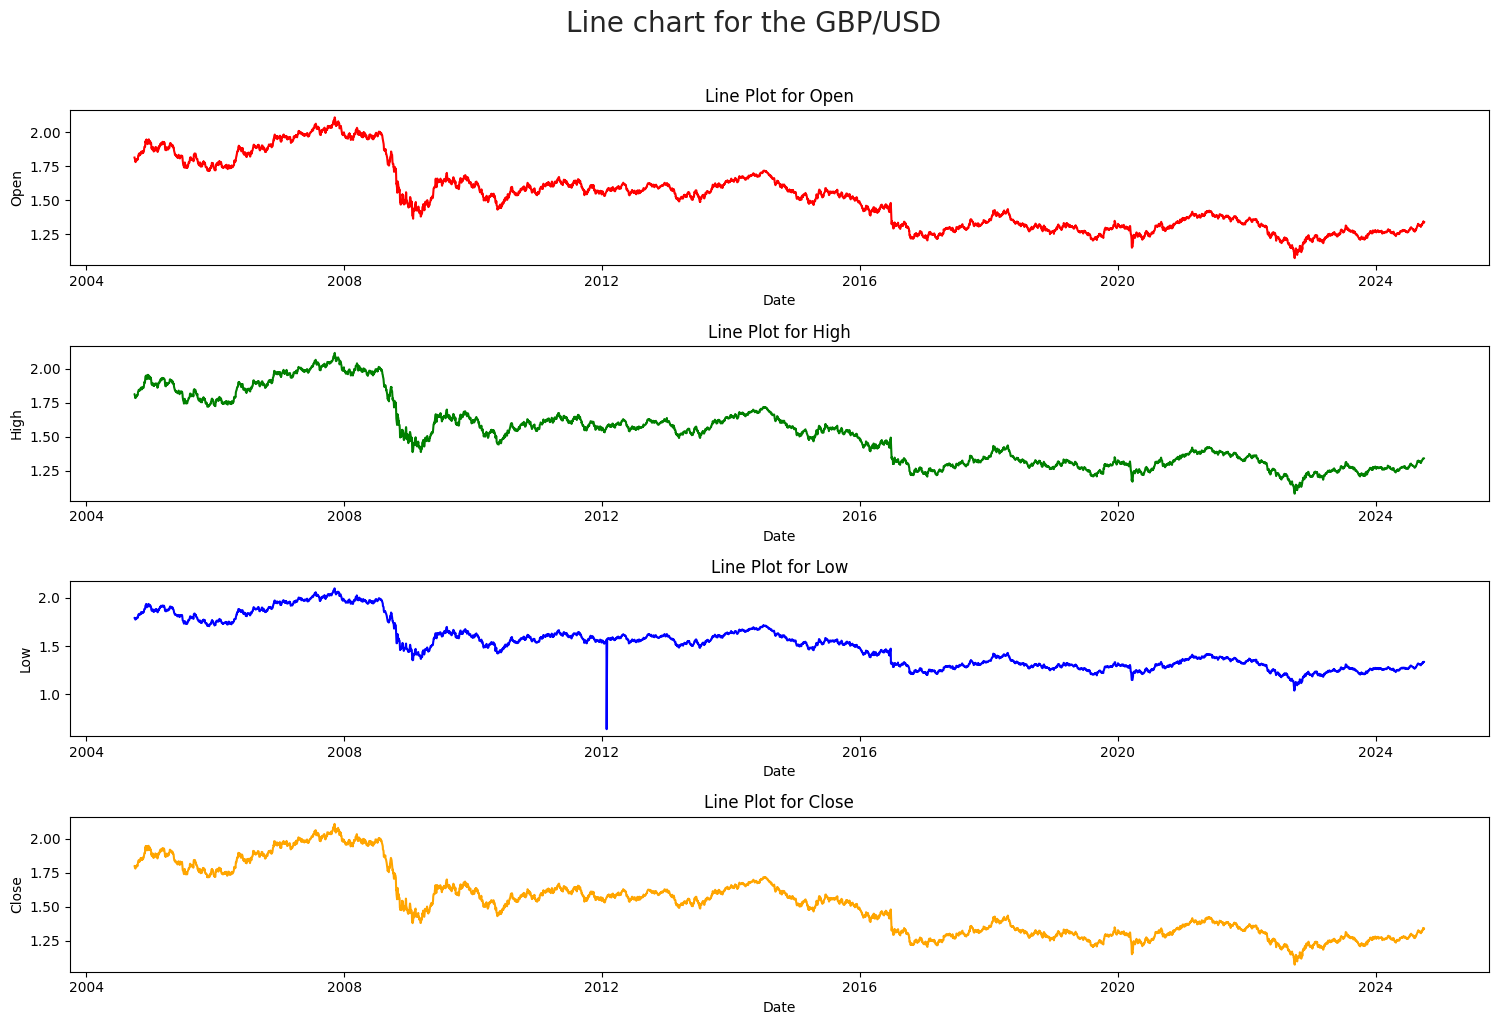

In [18]:
# This cell will plot the dataset line chart

fig, axs = plt.subplots(4,1, figsize=(15,10))

# define the columns of dataset
col = ['Open', 'High', 'Low', 'Close']

# define the colors of dataset
colors = ['red','green','blue','orange']

# for loop to set the line chart
for i,name in enumerate(col):
  sns.lineplot(data=data, x='Date', y=name, color=colors[i], ax=axs[i])
  axs[i].set_xlabel('Date')
  axs[i].set_ylabel(name)
  axs[i].set_title(f'Line Plot for {name}')
  sns.set_style('whitegrid')

plt.suptitle('Line chart for the GBP/USD', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

In [19]:
# plot the candlestick-style line chart for dataset using plotly
fig = go.Figure(data=[go.Candlestick(x=data.Date,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])

fig.update_layout(title='Candlestick chart for the GBP/USD',
                  xaxis_title='Date',
                  yaxis_title='Price')
fig.update_layout(width=1200,height=400)
#show the graph
fig.show()

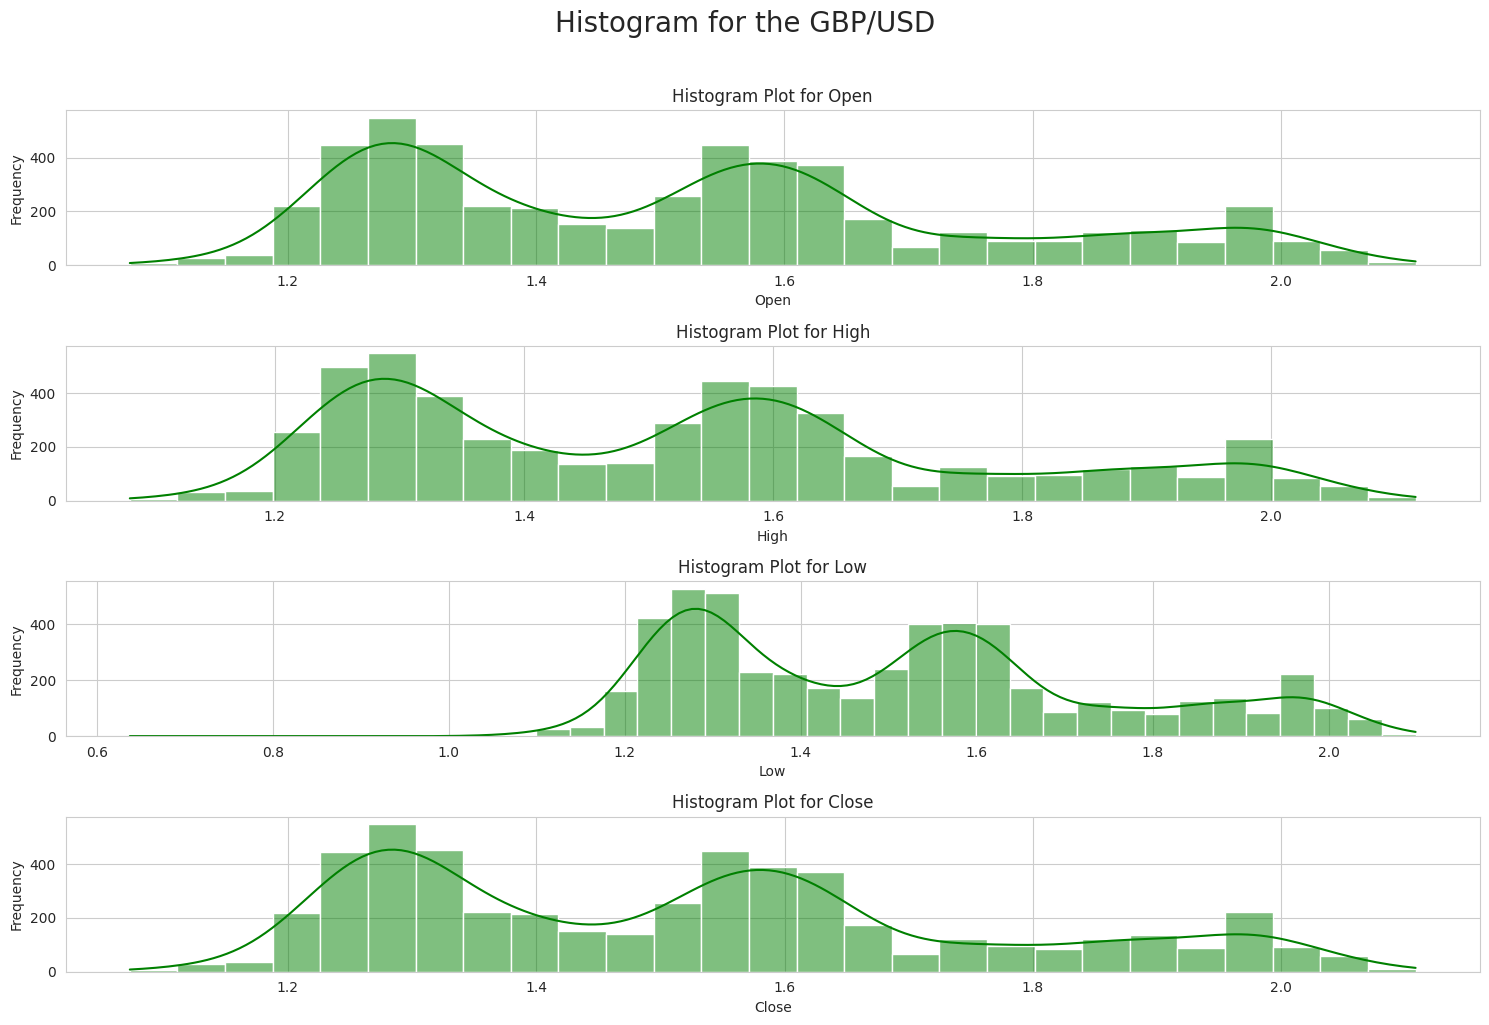

In [20]:
# plot the histogram
fig, axs = plt.subplots(4,1, figsize=(15,10))


for i,name in enumerate(col):
  sns.histplot(data=data[name],kde=True, color="green", ax=axs[i])
  axs[i].set_xlabel(name)
  axs[i].set_ylabel("Frequency")
  axs[i].set_title(f'Histogram Plot for {name}')

plt.suptitle('Histogram for the GBP/USD', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

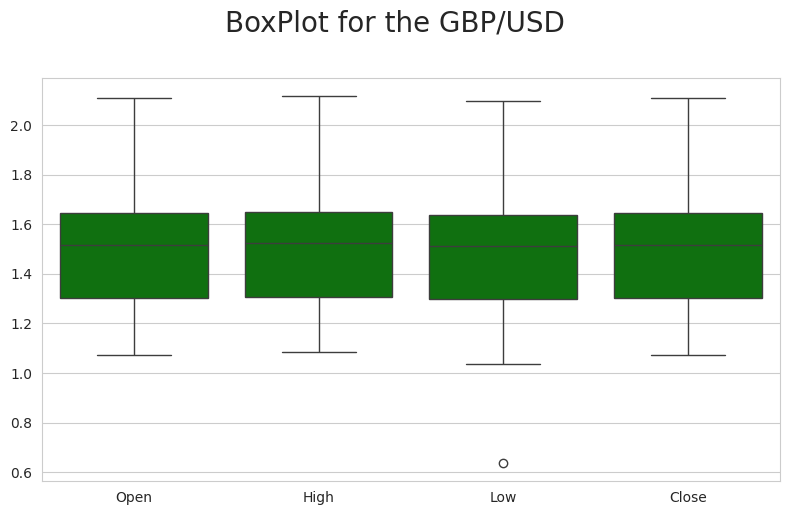

In [21]:
#plot Box Plot chart to check for outliers
plt.figure(figsize=(8,5))


sns.boxplot(data=data, color="green")

plt.suptitle('BoxPlot for the GBP/USD', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

In [22]:
# function to remove outliers
def remove_outliers(dataset,columns):
  '''
  Remove the outliers from the dataset

  Parameters:
  dataset: contains the forex data
  columns: contains the columns of the dataset
  '''

  for column in columns:
    #calculate the 25%(Q1) and 75% (q3)
    first_quantile = dataset[column].quantile(0.25)
    third_quantile = dataset[column].quantile(0.75)

    inter_qunatile = third_quantile - first_quantile # interquantile range

    #define the bounds
    lower_bound = first_quantile - 1.5*inter_qunatile
    upper_bound = third_quantile + 1.5*inter_qunatile

    #remove the outliers
    dataset = dataset[(dataset[column] >= lower_bound) & (dataset[column] <= upper_bound)]

  return dataset


In [23]:
# take the cleaned dataset
data_cleaned = remove_outliers(data,col)

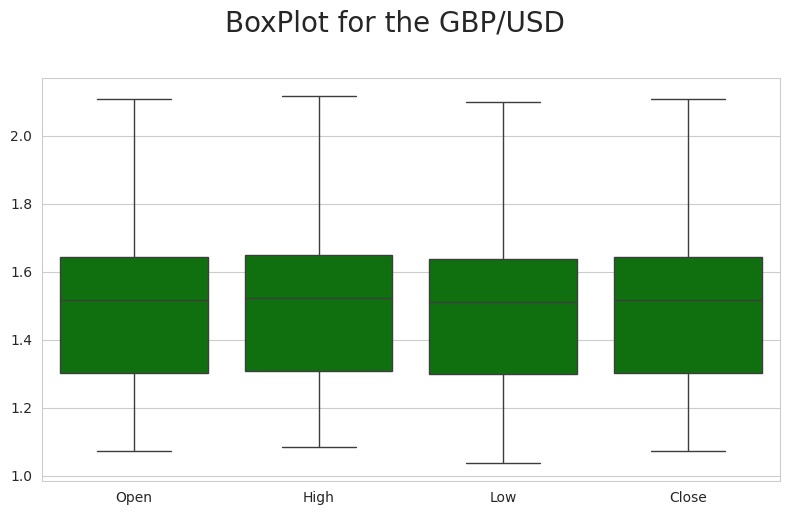

In [24]:
#plot the box plot again to check outliers removed
plt.figure(figsize=(8,5))

#plot the boxplot
sns.boxplot(data=data_cleaned, color="green")


plt.suptitle('BoxPlot for the GBP/USD', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

### **Techinal Indicators**

In [25]:
def calculate_ema(data, period):
  '''
  Calculate the exponential moving average for the data

  parameter:
  data: contains the GBP/USD close data
  period: contains the period of the moving average

  return: panda series
  '''
  return data.ewm(span=period, adjust=False).mean()

data_cleaned['EMA5'] = calculate_ema(data_cleaned['Close'], 5)
data_cleaned['EMA10'] = calculate_ema(data_cleaned['Close'], 10)
data_cleaned['EMA20'] = calculate_ema(data_cleaned['Close'], 20)


In [26]:
def calculate_sma(data, period):
  '''
  Calculate the simple moving average for the data

  parameter:
  data: contains the forex data
  period: contains the period of the moving average

  return: panda series
  '''
  return data.rolling(window=period).mean()

data_cleaned['SMA5'] = calculate_sma(data_cleaned['Close'], 5)
data_cleaned['SMA10'] = calculate_sma(data_cleaned['Close'], 10)
data_cleaned['SMA20'] = calculate_sma(data_cleaned['Close'], 20)


In [27]:
def calculate_rsi(data, period):
  '''
  Calculate the relative strength index for the data

  parameter:
  data: contains the forex data
  period: contains the period of the moving average

  return: panda series
  '''
  # difference in the prices
  diff_delta = data['Close'].diff(1)

  #gain
  gain = diff_delta.where(diff_delta > 0, 0)

  #loss
  loss = -diff_delta.where(diff_delta < 0, 0)

  # rolling average for the loss and gain
  average_gain = gain.rolling(window=period, min_periods=1).mean()
  average_loss = loss.rolling(window=period, min_periods=1).mean()

  # relative strength
  relative_strength = average_gain / average_loss

  # calculate RSI
  rsi = 100 - (100 / (1 + relative_strength))

  return rsi

data_cleaned['RSI12'] = calculate_rsi(data_cleaned, 12)
data_cleaned['RSI24'] = calculate_rsi(data_cleaned, 24)

In [28]:
def calculate_macd(data):
  '''
  Calculate the moving average convergence divergence (MACD), signal
  line and MACD histogram for the data

  parameter:
  data: contains the forex data

  return: multiple series (MACD, Macd histogram, signal line)
  '''
  # calculate the 12 and 26 ema
  ema12 = data['Close'].ewm(span=12, adjust=False).mean()
  ema26 = data['Close'].ewm(span=26, adjust=False).mean()
  # calculate the MACD
  macd = ema12 - ema26

  # calculate the signal line
  signal_line = macd.ewm(span=9, adjust=False).mean()

  # calculate the MACD histogram
  macd_histogram = macd - signal_line

  return macd, macd_histogram, signal_line

data_cleaned['MACD'], data_cleaned['MACD_Histogram'], data_cleaned['Signal_line'] = calculate_macd(data_cleaned)


In [29]:
def calculate_bollinger(data, sma20):
  '''
  Calculate the bollinger bands for the data

  parameter:
  data: contains the forex data
  sma20: contains the simple moving average of 20 days

  return: multiple series (bollinger bands)
  '''
  std = sma20.rolling(window=20).std()
  upper_band = sma20 + (std * 2)
  lower_band = sma20 - (std * 2)

  return upper_band, lower_band

data_cleaned['BB_Upper_band'], data_cleaned['BB_Lower_band'] = calculate_bollinger(data_cleaned, data_cleaned['SMA20'])

In [30]:
data_cleaned.describe()

,Date,Open,High,Low,Close,EMA5,EMA10,EMA20,SMA5,SMA10,SMA20,RSI12,RSI24,MACD,MACD_Histogram,Signal_line,BB_Upper_band,BB_Lower_band
count,5199,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5195.000000,5190.000000,5180.000000,5198.000000,5198.000000,5199.000000,5199.000000,5199.000000,5161.000000,5161.000000
mean,2014-10-06 18:42:18.488170752,1.518287,1.523905,1.512468,1.518310,1.518488,1.518715,1.519179,1.518275,1.518234,1.518152,49.917907,49.824419,-0.000655,0.000006,-0.000661,1.533116,1.500887
min,2004-10-01 00:00:00,1.072846,1.083541,1.037904,1.072754,1.089887,1.106927,1.120575,1.086064,1.106786,1.113240,0.000000,0.000000,-0.059307,-0.015220,-0.055333,1.134304,1.085289
25%,2009-10-12 12:00:00,1.303560,1.307925,1.299258,1.303603,1.303792,1.303959,1.303161,1.303638,1.303996,1.302686,37.325419,41.056135,-0.005846,-0.001747,-0.005593,1.312924,1.291091
50%,2014-10-09 00:00:00,1.517865,1.523926,1.511259,1.517911,1.518145,1.519161,1.523193,1.517616,1.517211,1.519903,50.064914,50.006096,0.000118,-0.000007,0.000146,1.537397,1.497829
75%,2019-10-07 12:00:00,1.643561,1.648465,1.636916,1.643385,1.642330,1.641498,1.641373,1.642639,1.642637,1.640198,62.926876,59.363568,0.005616,0.001857,0.005265,1.653667,1.624830
max,2024-09-30 00:00:00,2.108415,2.115820,2.098812,2.108192,2.094209,2.084708,2.070346,2.094231,2.084354,2.072104,100.000000,91.559433,0.038755,0.015213,0.033321,2.091853,2.058757
std,NaN,0.237309,0.237976,0.236788,0.237332,0.237167,0.237001,0.236669,0.237202,0.237064,0.236777,18.284582,12.915935,0.009980,0.002951,0.009416,0.238405,0.235199


In [31]:
# take some data point point to get more clear view of indicators

data_cleaned_indicators = data_cleaned[(data_cleaned['Date'] > '2016-01-01') & (data_cleaned['Date'] < '2017-01-01')]


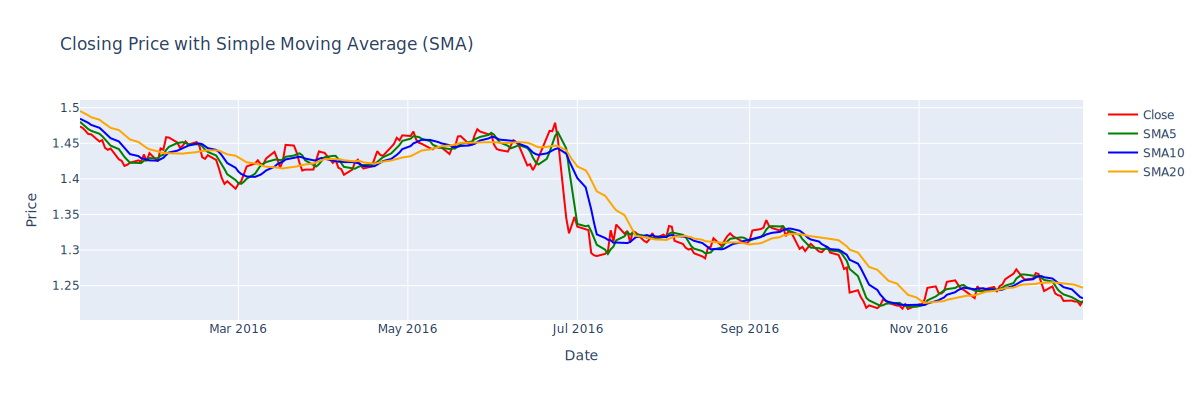

In [32]:
#plot SMA's with the closing price

fig = go.Figure()

#add the closing price
fig.add_trace(go.Scatter(x=data_cleaned_indicators['Date'], y=data_cleaned_indicators['Close'], marker_color='red', name='Close', showlegend=True))
#add the SMA5
fig.add_trace(go.Scatter(x=data_cleaned_indicators['Date'], y=data_cleaned_indicators['SMA5'], marker_color='green', name='SMA5', showlegend=True))
#add the SMA10
fig.add_trace(go.Scatter(x=data_cleaned_indicators['Date'], y=data_cleaned_indicators['SMA10'], marker_color='blue', name='SMA10', showlegend=True))
#add the SMA20
fig.add_trace(go.Scatter(x=data_cleaned_indicators['Date'], y=data_cleaned_indicators['SMA20'], marker_color='orange', name='SMA20', showlegend=True))

fig.update_layout(title='Closing Price with Simple Moving Average (SMA)', xaxis_title='Date', yaxis_title='Price')

fig.update_layout(width=1200,height=400)
#show the graph
fig.show("svg")


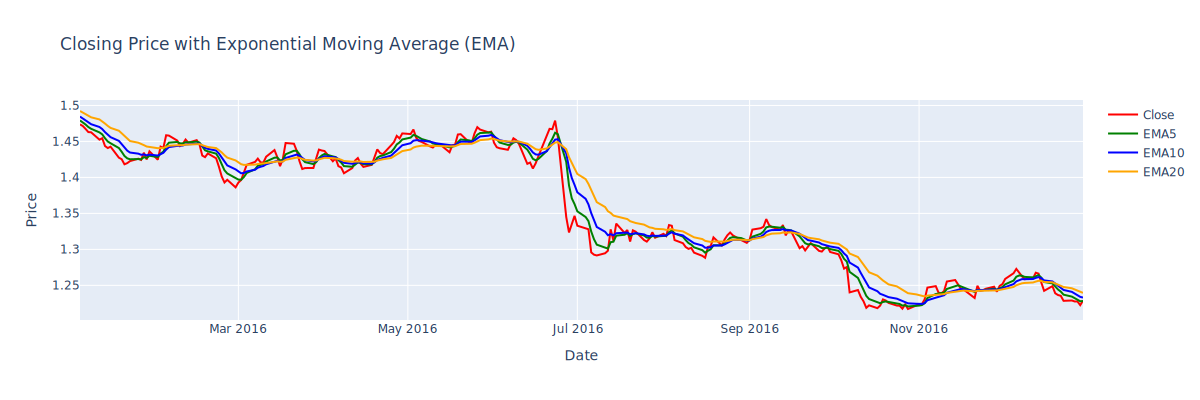

In [33]:
#plot the EMA's with the closing price
fig = go.Figure()

#add the closing price
fig.add_trace(go.Scatter(x=data_cleaned_indicators['Date'], y=data_cleaned_indicators['Close'], marker_color='red', name='Close', showlegend=True))
#add EMA5
fig.add_trace(go.Scatter(x=data_cleaned_indicators['Date'], y=data_cleaned_indicators['EMA5'], marker_color='green', name='EMA5', showlegend=True))
#add EMA10
fig.add_trace(go.Scatter(x=data_cleaned_indicators['Date'], y=data_cleaned_indicators['EMA10'], marker_color='blue', name='EMA10', showlegend=True))
#add EMA20
fig.add_trace(go.Scatter(x=data_cleaned_indicators['Date'], y=data_cleaned_indicators['EMA20'], marker_color='orange', name='EMA20', showlegend=True))

fig.update_layout(title='Closing Price with Exponential Moving Average (EMA)', xaxis_title='Date', yaxis_title='Price')

fig.update_layout(width=1200,height=400)
#show the graph
fig.show("svg")

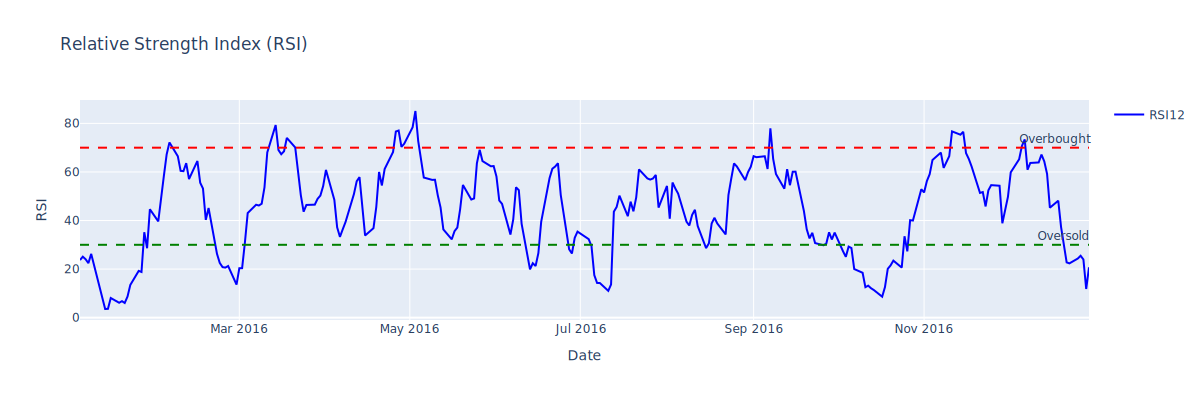

In [34]:
# plot for RSI24

fig = go.Figure()

#add the RSI24 line on the chart
fig.add_trace(go.Scatter(x=data_cleaned_indicators['Date'], y=data_cleaned_indicators['RSI12'], marker_color='blue', name='RSI12', showlegend=True))

#add the hirizontal line for the overbought position
fig.add_hline(y=70, line_color='red', line_dash='dash', annotation_text='Overbought')

#add the hirizontal line for the oversold position
fig.add_hline(y=30, line_color='green', line_dash='dash', annotation_text='Oversold')

fig.update_layout(title='Relative Strength Index (RSI)', xaxis_title='Date', yaxis_title='RSI')

fig.update_layout(width=1200,height=400)
#show the graph
fig.show("svg")

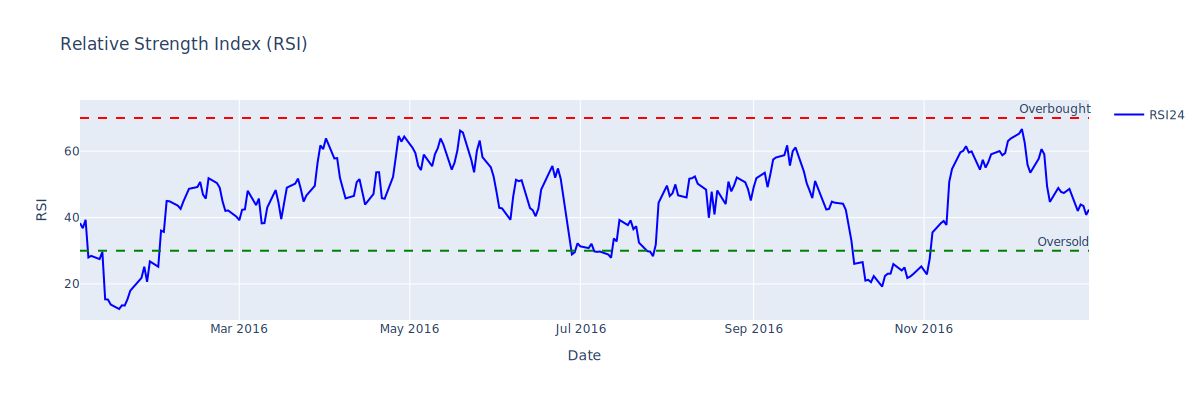

In [35]:
# plot for RSI24

fig = go.Figure()

#add the RSI24 line on the chart
fig.add_trace(go.Scatter(x=data_cleaned_indicators['Date'], y=data_cleaned_indicators['RSI24'], marker_color='blue', name='RSI24', showlegend=True))

#add the hirizontal line for the overbought position
fig.add_hline(y=70, line_color='red', line_dash='dash', annotation_text='Overbought')

#add the hirizontal line for the oversold position
fig.add_hline(y=30, line_color='green', line_dash='dash', annotation_text='Oversold')

fig.update_layout(title='Relative Strength Index (RSI)', xaxis_title='Date', yaxis_title='RSI')

fig.update_layout(width=1200,height=400)
#show the graph
fig.show("svg")

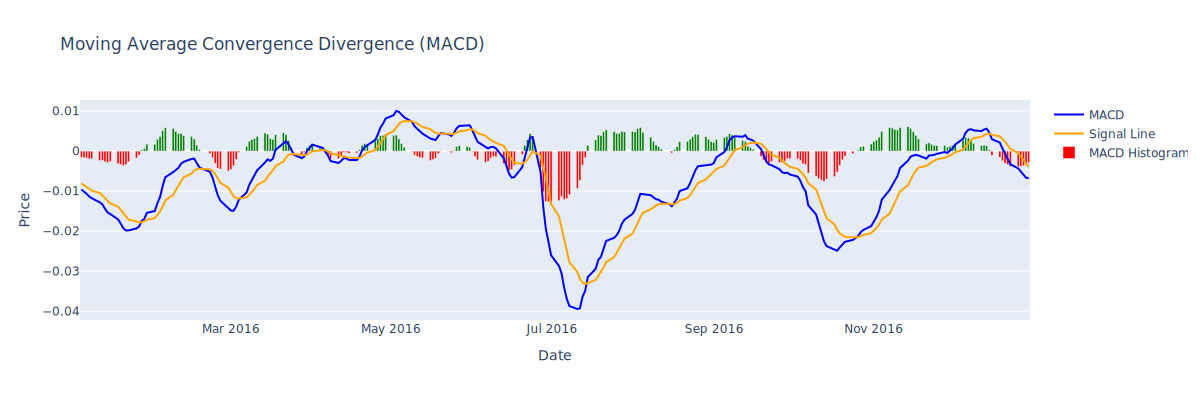

In [36]:
#plot the MACD with plotly to visualise better way

fig = go.Figure()

#add the MACD line on the chart
fig.add_trace(go.Scatter(x=data_cleaned_indicators['Date'], y=data_cleaned_indicators['MACD'], marker_color='blue', name='MACD'))

#add the signal line on the chart
fig.add_trace(go.Scatter(x=data_cleaned_indicators['Date'], y=data_cleaned_indicators['Signal_line'], marker_color='orange', name='Signal Line'))

#add the histogram on the chart
fig.add_trace(go.Bar(x=data_cleaned_indicators['Date'], y=data_cleaned_indicators['MACD_Histogram'], name='MACD Histogram',
                     marker_color=['green' if val>0 else 'red' for val in data_cleaned_indicators['MACD_Histogram']]))


fig.update_layout(title='Moving Average Convergence Divergence (MACD)', xaxis_title='Date', yaxis_title='Price')

fig.update_layout(width=1200,height=400)
#show the graph
fig.show("svg")

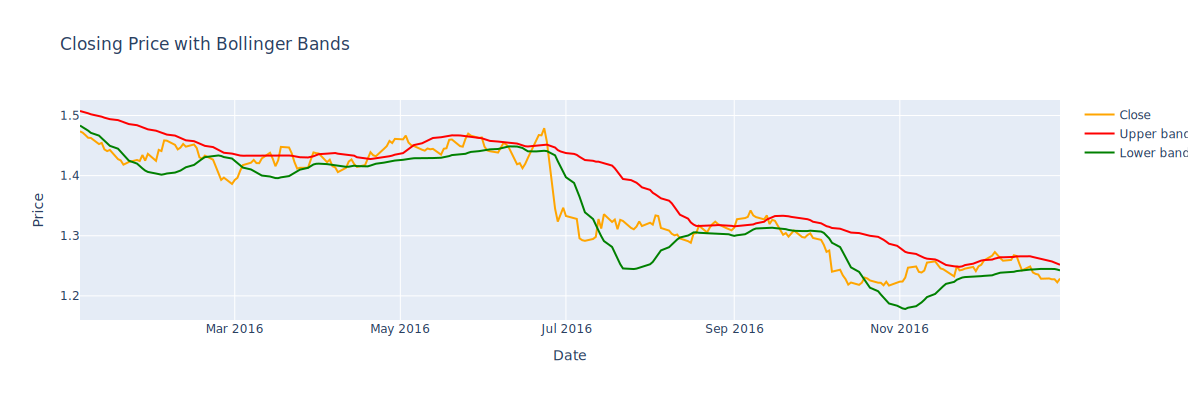

In [37]:
#plot the Closing price Bollinger band

fig = go.Figure()

#add the closing price
fig.add_trace(go.Scatter(x=data_cleaned_indicators['Date'], y=data_cleaned_indicators['Close'], marker_color='orange', name='Close', showlegend=True))

#add the upper band
fig.add_trace(go.Scatter(x=data_cleaned_indicators['Date'], y=data_cleaned_indicators['BB_Upper_band'], marker_color='red', name='Upper band', showlegend=True))

#add the lower band
fig.add_trace(go.Scatter(x=data_cleaned_indicators['Date'], y=data_cleaned_indicators['BB_Lower_band'], marker_color='green', name='Lower band', showlegend=True))

#update the layout
fig.update_layout(title='Closing Price with Bollinger Bands', xaxis_title='Date', yaxis_title='Price')

fig.update_layout(width=1200,height=400)
#show the graph
fig.show("svg")

In [38]:
# prepare the dataset for the model
data_cleaned.head()

,Date,Open,High,Low,Close,EMA5,EMA10,EMA20,SMA5,SMA10,SMA20,RSI12,RSI24,MACD,MACD_Histogram,Signal_line,BB_Upper_band,BB_Lower_band
0,2004-10-01,1.812908,1.813598,1.793400,1.799111,1.799111,1.799111,1.799111,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN
1,2004-10-04,1.797591,1.797785,1.782086,1.784312,1.794178,1.796421,1.797702,NaN,NaN,NaN,0.000000,0.000000,-0.001181,-0.000944,-0.000236,NaN,NaN
2,2004-10-05,1.784312,1.787694,1.780912,1.782912,1.790423,1.793965,1.796293,NaN,NaN,NaN,0.000000,0.000000,-0.002204,-0.001574,-0.000630,NaN,NaN
3,2004-10-06,1.782785,1.788493,1.775095,1.779486,1.786777,1.791332,1.794693,NaN,NaN,NaN,0.000000,0.000000,-0.003253,-0.002099,-0.001154,NaN,NaN
4,2004-10-07,1.779486,1.784312,1.777493,1.782499,1.785351,1.789726,1.793531,1.785664,NaN,NaN,13.310409,13.310409,-0.003799,-0.002115,-0.001683,NaN,NaN


In [39]:
#cut the first 30 values of the dataset which has Nan values
data_cleaned = data_cleaned[38:]


In [40]:
data_cleaned.head()

,Date,Open,High,Low,Close,EMA5,EMA10,EMA20,SMA5,SMA10,SMA20,RSI12,RSI24,MACD,MACD_Histogram,Signal_line,BB_Upper_band,BB_Lower_band
38,2004-11-25,1.881503,1.894190,1.880406,1.891790,1.875526,1.866176,1.854293,1.872356,1.862636,1.854303,67.062009,67.383189,0.014887,0.002211,0.012675,1.884704,1.823902
39,2004-11-26,1.891790,1.903384,1.884908,1.893509,1.881520,1.871146,1.858028,1.879041,1.866258,1.857073,73.622658,67.368046,0.016181,0.002804,0.013376,1.886975,1.827172
40,2004-11-29,1.892004,1.896598,1.885690,1.892506,1.885182,1.875029,1.861312,1.885580,1.870867,1.860063,75.753025,64.625543,0.016930,0.002843,0.014087,1.889356,1.830770
41,2004-11-30,1.892398,1.913107,1.887398,1.909600,1.893321,1.881315,1.865911,1.893704,1.876508,1.863553,76.469992,69.961297,0.018688,0.003681,0.015007,1.892414,1.834693
42,2004-12-01,1.909600,1.935696,1.909600,1.933114,1.906585,1.890733,1.872311,1.904104,1.883880,1.867829,88.892264,76.219641,0.021728,0.005377,0.016352,1.896673,1.838984


In [41]:
train_col = [col for col in  data_cleaned.columns  if col != 'Close' and col != 'Date']
print(train_col)

['Open', 'High', 'Low', 'EMA5', 'EMA10', 'EMA20', 'SMA5', 'SMA10', 'SMA20', 'RSI12', 'RSI24', 'MACD', 'MACD_Histogram', 'Signal_line', 'BB_Upper_band', 'BB_Lower_band']


In [42]:
data_feature = data_cleaned[train_col]
data_target = data_cleaned['Close']

print(data_feature.shape)
print(data_target.shape)

(5161, 16)
(5161,)


In [43]:
#scale the feature set data
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(data_feature[data_feature.columns])
data_feature_scaled = scaler.transform(data_feature[data_feature.columns])

#scale the target set data
scaler.fit(data_target.values.reshape(-1,1))
data_target_scaled = scaler.transform(data_target.values.reshape(-1,1))


In [44]:
#get the date column
df_date = data_cleaned['Date']
df_date.head()

,Date
38,2004-11-25
39,2004-11-26
40,2004-11-29
41,2004-11-30
42,2004-12-01


In [45]:
#split the data into train and test split size
train_size_data = int(len(data_feature_scaled)*0.7)
test_size_data =  len(data_feature_scaled) - train_size_data

#make the target axis train test split size

train_size_y = int(len(data_target_scaled)*0.7)
test_size_y =  len(data_target_scaled) - train_size_y

#make the train test data for feature
trainX, testX = data_feature_scaled[:train_size_data,:], data_feature_scaled[train_size_data:len(data_feature_scaled),:]

#make the target data
trainY, testY = data_target_scaled[:train_size_y,], data_target_scaled[train_size_y:len(data_target_scaled),]

#make the validation data
valX_size = int(len(testX)*0.5)
testX_size = len(testX) - valX_size

valX_data, testX_data = testX[:testX_size-1,], testX[testX_size-1:len(testX),]
valY_data, testY_data = testY[:testX_size-1,], testY[testX_size-1:len(testY),]



In [46]:
#get the date
train_date = df_date[:train_size_data]
val_date = df_date[train_size_data:train_size_data+valX_size-15]
test_date = df_date[train_size_data+valX_size:len(df_date)-15]

print("train date shape", train_date.shape)
print("validation date shape", val_date.shape)
print("test date shape", test_date.shape)

train date shape (3612,)
validation date shape (759,)
test date shape (760,)


In [47]:
#print the shape of the train data and test data

print("Train data shapes : ", trainX.shape, trainY.shape)
print("Validation data shapes : ", valX_data.shape, valY_data.shape)
print("Test data shapes : ", testX_data.shape, testY_data.shape)

Train data shapes :  (3612, 16) (3612, 1)
Validation data shapes :  (774, 16) (774, 1)
Test data shapes :  (775, 16) (775, 1)


In [48]:
#Make the series time frame for the mode

def dataset_series(dataX, dataY, look_back):
  '''
  generate sequence for the features and target values

  parameters:
   dataX: input features data
   dataY: target feature data
   look_back: the window size for the data

   return:
   np.array : array of input feature with look back window
   np.array : array of test feature with look back window
  '''
  x, y = [], []
  for i in range(len(dataX) - look_back):
    xData = dataX[i: i+look_back]
    x.append(xData)
    y.append(dataY[i+look_back])
  return np.array(x), np.array(y)


In [49]:
#make the time series dataset

#make the train series
data_feature_train_series, y_target_train_series = dataset_series(
                                                  trainX,
                                                  trainY, 15)

#make the validation series
data_feature_val_series, y_target_val_series = dataset_series(
                                                valX_data,
                                                valY_data, 15)

#make the test series
data_feature_test_series, y_target_test_series = dataset_series(
                                                  testX_data,
                                                  testY_data, 15)


In [50]:
#print the shape of the datasets

print("Train data shapes : ", data_feature_train_series.shape,
      y_target_train_series.shape)
print("Validation data shapes : ", data_feature_val_series.shape,
      y_target_val_series.shape)
print("Test data shapes : ", data_feature_test_series.shape,
      y_target_test_series.shape)

Train data shapes :  (3597, 15, 16) (3597, 1)
Validation data shapes :  (759, 15, 16) (759, 1)
Test data shapes :  (760, 15, 16) (760, 1)


## **Model Development**

### **LSTM**

In [177]:
def lstm_model():
  '''
  Function to build LSTM model
  return :
  lstm_model = return the model lstm
  '''
  model = Sequential()
  #layer 1
  model.add(LSTM(units=100, return_sequences=True, input_shape=(data_feature_train_series.shape[1], data_feature_train_series.shape[2])))
  model.add(Dropout(0.1))
  #layer 2
  #add lstm layer with BatchNormalization
  model.add(LSTM(units=60))
  model.add(BatchNormalization())
  #add a dense output layer
  model.add(Dense(units = 50, activation='relu'))
  model.add(Dense(units = 1))

  #compile the mdoel
  model.compile(optimizer='adam', loss='mean_squared_error')
  return model


In [178]:
# initilize LSTM model
model_lstm = lstm_model()

#make an early stop to prevent from overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_lstm.fit(data_feature_train_series, y_target_train_series
                         , epochs=100, batch_size=32,
                         validation_data=(data_feature_val_series,
                                          y_target_val_series),
                         callbacks=[early_stop])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1170 - val_loss: 0.0023
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0101 - val_loss: 0.0015
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0057 - val_loss: 0.0126
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0054 - val_loss: 0.0298
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0042 - val_loss: 0.0138
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0045 - val_loss: 0.0045
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0046 - val_loss: 6.0241e-04
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0033 - val_loss: 0.0036
Epoch 9/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0031 - val_loss: 0.0012
Epoch 10/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0025 - val_loss: 0.0048
Epoch 11/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0029 - val_loss: 0.0067
Epoch 12/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 

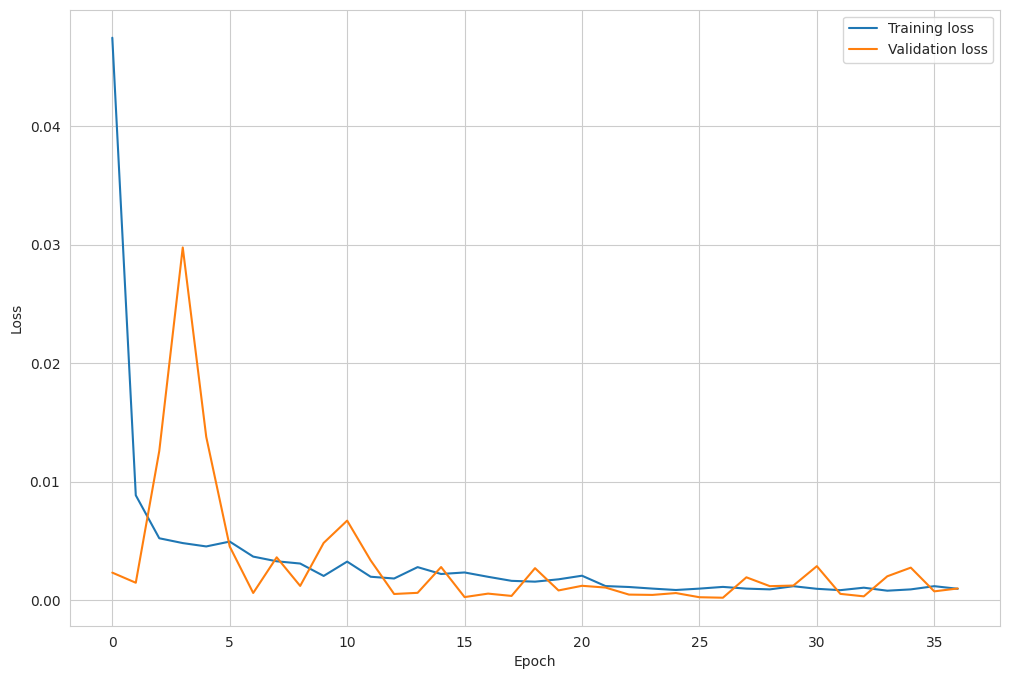

In [179]:
#plot the training and validation losses

fig , ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=history.history['loss'], label='Training loss', ax=ax)
sns.lineplot(data=history.history['val_loss'], label='Validation loss',ax=ax)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()
plt.show()

In [180]:
#measue the accuracy

#make prediction on the model
prediction = model_lstm.predict(data_feature_test_series)
prediction_inverse = scaler.inverse_transform(prediction)
actual_prices = scaler.inverse_transform(y_target_test_series)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [181]:
mae = mean_absolute_error(actual_prices, prediction_inverse)
rmse = np.sqrt(np.mean(((prediction_inverse - actual_prices) ** 2)))
mse = mean_squared_error(actual_prices, prediction_inverse)
r2 = r2_score(actual_prices, prediction_inverse)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Square Error: {mse}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 0.012460291777786452
Root Mean Squared Error: 0.0209804724145555
Mean Square Error: 0.0004401802227379243
R-squared: 0.85


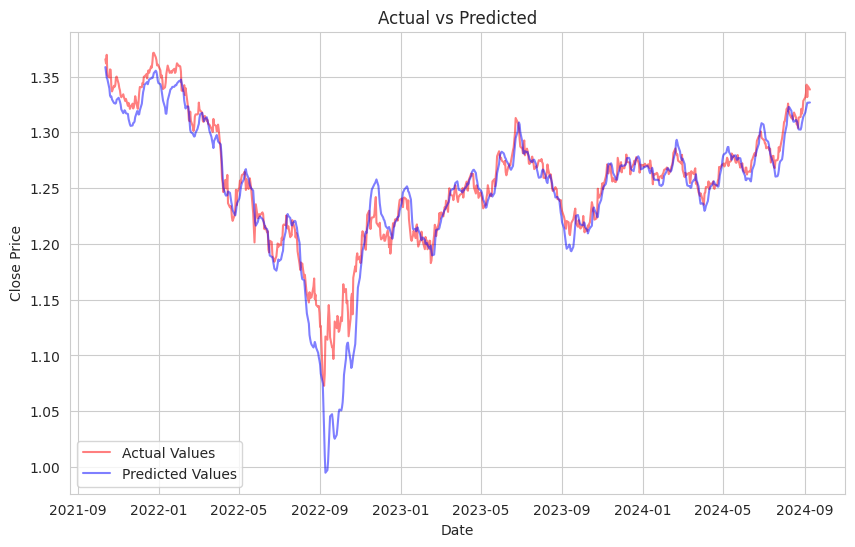

In [182]:
#Plot the prediction vs actual prices
plt.figure(figsize=(10, 6))
plt.plot(test_date.values,actual_prices, alpha=0.5,color='red', label='Actual Values')
plt.plot(test_date.values,prediction_inverse, alpha=0.5, color='blue', label='Predicted Values')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

In [183]:
#save the model
model_lstm.save("lstm_model.keras")

### GRU

In [184]:
def gru_model():
  '''
  function to create the GRU model
  return :
  gru_model = return the model gru
  '''
  model = Sequential()

  # Add an input layer with the same shape as the training data
  model.add(InputLayer((data_feature_train_series.shape[1],
                        data_feature_train_series.shape[2])))

  # Add a GRU layer with 64 hidden states
  model.add(GRU(64))

  # Add a Dense layer with 8 neurons and ReLU activation
  model.add(Dense(8, 'relu'))

  # Add an output layer with 1 neuron and linear activation
  model.add(Dense(1, 'linear'))
  model.compile(optimizer='adam', loss='mean_squared_error')
  return model

In [185]:
#initialize the gru model
model_GRU = gru_model()
#fit the model
history_gru = model_GRU.fit(data_feature_train_series, y_target_train_series
                         , epochs=100, batch_size=32,
                         validation_data=(data_feature_val_series,
                                          y_target_val_series),
                         callbacks=[early_stop])

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0366 - val_loss: 1.5153e-04
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.4587e-04 - val_loss: 1.1149e-04
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.5746e-04 - val_loss: 7.4306e-05
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.5090e-04 - val_loss: 7.0913e-05
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.4161e-04 - val_loss: 9.4090e-05
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1764e-04 - val_loss: 8.0892e-05
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.3161e-04 - val_loss: 5.7701e-05
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2940e-04 - val_loss: 6.9647e-05
Epoch 9/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.2241e-04 - val_loss: 5.3792e-05
Epoch 10/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.1733e-04 - val_loss: 6.0732e-05
Epoch 11/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/st

In [186]:
#measue the accuracy

#make prediction on the model
prediction_gru = model_GRU.predict(data_feature_test_series)
prediction_inverse_gru = scaler.inverse_transform(prediction_gru)
actual_prices_gru = scaler.inverse_transform(y_target_test_series)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [187]:
#Evaluate the model performance
mae = mean_absolute_error(actual_prices_gru, prediction_inverse_gru)
rmse = np.sqrt(np.mean(((prediction_inverse_gru - actual_prices_gru) ** 2)))
mse = mean_squared_error(actual_prices_gru, prediction_inverse_gru)
r2 = r2_score(actual_prices_gru, prediction_inverse_gru)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Square Error: {mse}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 0.0041259094288474615
Root Mean Squared Error: 0.005636791501655313
Mean Square Error: 3.177341843313356e-05
R-squared: 0.99


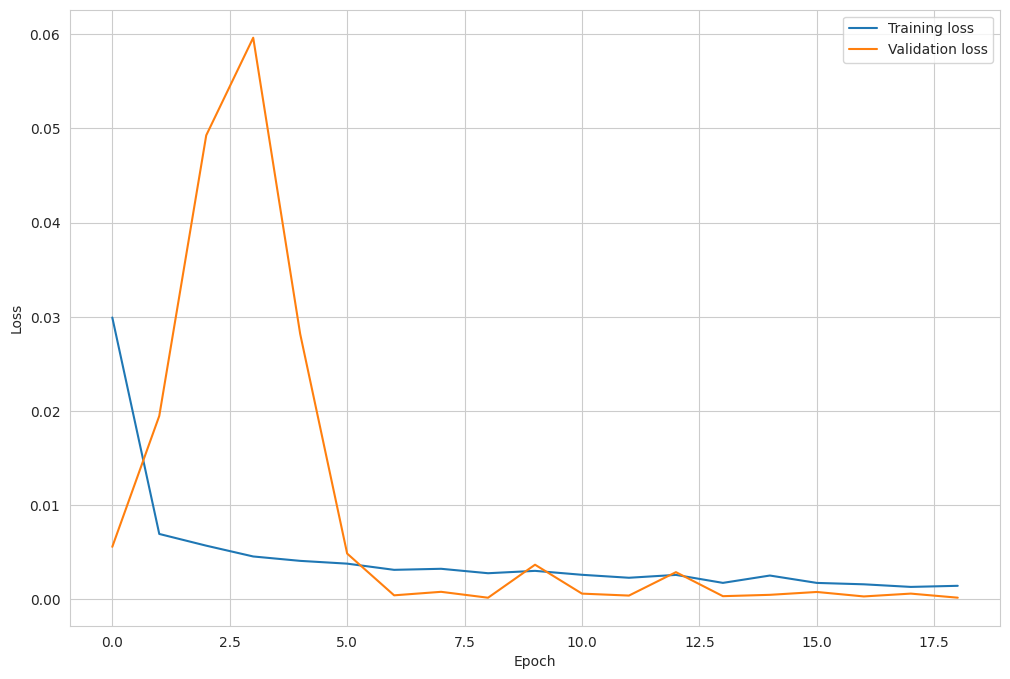

In [188]:
#plot the training and validation losses

fig , ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=history.history['loss'], label='Training loss', ax=ax)
sns.lineplot(data=history.history['val_loss'], label='Validation loss',ax=ax)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.legend()
plt.show()

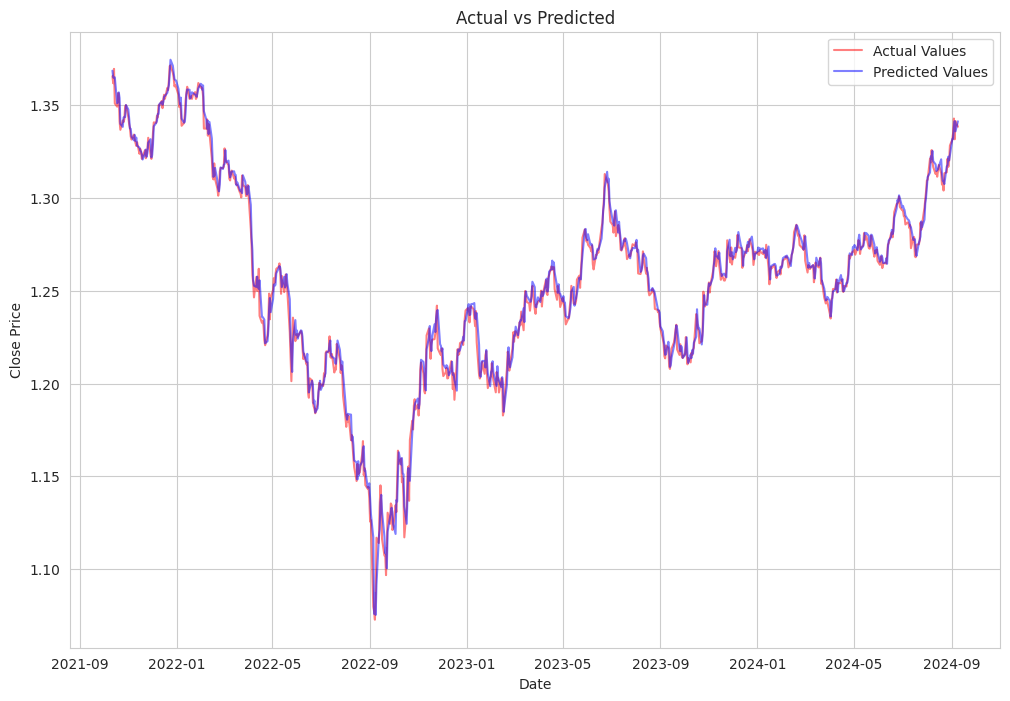

In [189]:
fig , ax = plt.subplots(figsize=(12,8))
plt.plot(test_date.values,actual_prices_gru,alpha=0.5,color='red', label='Actual Values')
plt.plot(test_date.values,prediction_inverse_gru,alpha=0.5, color='blue', label='Predicted Values')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

In [190]:
#save the model
model_GRU.save("gru_model.keras")


### XGboost model


In [66]:
# Creating train, test, and validation dataset for XGBOOST
x_train_xg = data_feature_train_series.reshape(data_feature_train_series.shape[0], -1)
x_val_xg = data_feature_val_series.reshape(data_feature_val_series.shape[0], -1)
x_test_xg= data_feature_test_series.reshape(data_feature_test_series.shape[0], -1)

In [103]:
#Checking the shape of a datasett
print(x_train_xg.shape)
print(x_val_xg.shape)
print(x_test_xg.shape)

(3597, 240)
(759, 240)
(760, 240)


In [67]:
#flatten the dataset
y_train_xg = y_target_train_series.flatten()
y_val_xg= y_target_val_series.flatten()
y_test_xg = y_target_test_series.flatten()


In [105]:
#print the values
print(y_train_xg.shape)
print(y_val_xg.shape)
print(y_test_xg.shape)

(3597,)
(759,)
(760,)


In [106]:
# creating the list of parameter
parameters = {
    'n_estimators': 600,
    'learning_rate': 0.1,
    'max_depth': 12,
    'gamma': 0.001,
    'random_state': 42,
    'min_child_weight':3,
    'subsample':1,
    'colsample_bytree':1,
    'colsample_bylevel':1,
    'reg_alpha': 0.1,
    'reg_lambda': 1.5
}

In [107]:
# creating model xgboost
model_xgboost = XGBRegressor(**parameters, objective='reg:squarederror')



In [108]:
# Direct fit - no need for sklearn pipeline
result_xg = model_xgboost.fit(
    x_train_xg,
    y_train_xg,
    eval_set=[(x_val_xg, y_val_xg)],
    verbose=False
)

In [109]:
# Making predictions on the test set
xg_test_predictions = result_xg.predict(x_test_xg)
xg_test_predictions = scaler.inverse_transform(xg_test_predictions.reshape(-1,1))
y_test_seq_inverse_xg = scaler.inverse_transform(y_test_xg.reshape(-1,1))


In [110]:
# evaluate the model
mae_xg = mean_absolute_error(y_test_seq_inverse_xg, xg_test_predictions)
rmse_xg = np.sqrt(np.mean(((xg_test_predictions - y_test_seq_inverse_xg) ** 2)))
mse_xg = mean_squared_error(y_test_seq_inverse_xg, xg_test_predictions)
r2_xg = r2_score(y_test_seq_inverse_xg, xg_test_predictions)

print(f"Mean Absolute Error: {mae_xg}")
print(f"Root Mean Squared Error: {rmse_xg}")
print(f"Mean Square Error: {mse_xg}")
print(f"R-squared: {r2_xg:.2f}")

Mean Absolute Error: 0.013892733266479093
Root Mean Squared Error: 0.028659384849206302
Mean Absolute Error: 0.0008213603399349156
R-squared: 0.73


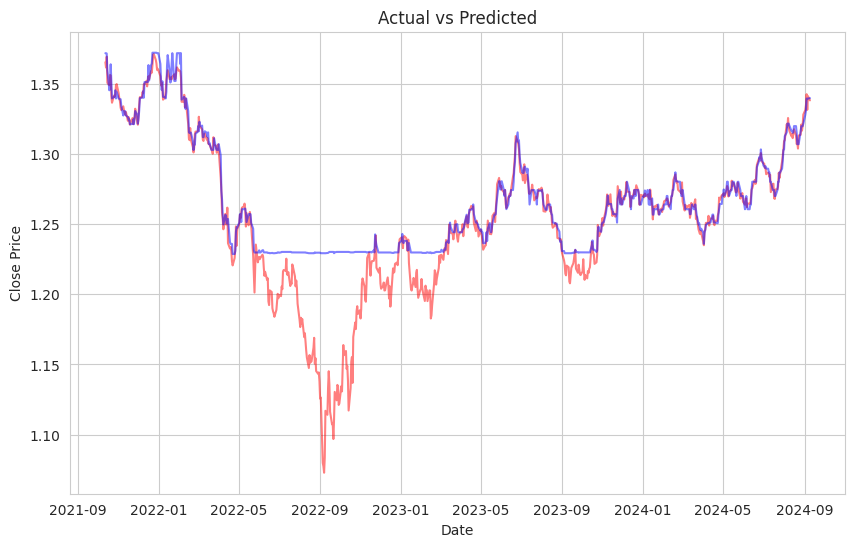

In [111]:
plt.figure(figsize=(10, 6))
plt.plot(test_date.values,y_test_seq_inverse_xg, alpha=0.5,color='red', label='Actual Values')
plt.plot(test_date.values,xg_test_predictions, alpha=0.5, color='blue', label='Predicted Values')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Actual vs Predicted")
plt.show()

**Fine Tune XGBoost**

In [112]:
# List of parameters
list_of_paramters = {
    'n_estimators': [100,150,200],
    'learning_rate': [0.05,0.1],
    'max_depth': [4,5],
    'min_child_weight':[2,3,4],
    'colsample_bytree':[1],
    'colsample_bylevel':[1],
    'reg_alpha': [0,0.1],
    'reg_lambda': [1,1.5]

}

In [113]:
# finding best parameter
def best_parameter(params,mse_xg):
  best_params=[]
  best_mse_score = mse_xg
  for n_estimators in params['n_estimators']:
    for learning_rate in params['learning_rate']:
      for max_depth in params['max_depth']:
                for min_child_weight in params['min_child_weight']:
                    for reg_alpha in params['reg_alpha']:
                      for reg_lambda in params['reg_lambda']:
                        list_params = {
                            'n_estimators': n_estimators,
                            'learning_rate': learning_rate,
                            'max_depth': max_depth,
                            'min_child_weight':min_child_weight,
                            'colsample_bytree':1,
                            'colsample_bylevel':1,
                            'reg_alpha': reg_alpha,
                            'reg_lambda': reg_lambda
                        }
                        model_xgboost = XGBRegressor(**list_params, objective='reg:squarederror')
                        model_xgboost.fit(x_train_xg, y_train_xg, eval_set=[(x_val_xg, y_val_xg)], verbose=False)
                        temp_pred = model_xgboost.predict(x_test_xg)
                        xg_test_predictions = scaler.inverse_transform(temp_pred.reshape(-1,1))
                        y_test_seq_inverse_xg = scaler.inverse_transform(y_test_xg.reshape(-1,1))
                        mse = mean_squared_error(y_test_seq_inverse_xg, xg_test_predictions)
                        print("parameter", list_params)
                        print("mse", mse)
                        if mse < best_mse_score:
                          print("Best parameters")

                          best_mse_score = mse
                          best_params = list_params
  return best_params, best_mse_score



In [114]:
best_params,best_mse_score=best_parameter(list_of_paramters,mse_xg)

parameter {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 2, 'colsample_bytree': 1, 'colsample_bylevel': 1, 'reg_alpha': 0, 'reg_lambda': 1}
mse 0.0007319040931695456
Best parameters
parameter {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 2, 'colsample_bytree': 1, 'colsample_bylevel': 1, 'reg_alpha': 0, 'reg_lambda': 1.5}
mse 0.0007459926135066672
parameter {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 2, 'colsample_bytree': 1, 'colsample_bylevel': 1, 'reg_alpha': 0.1, 'reg_lambda': 1}
mse 0.000910395104051251
parameter {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 2, 'colsample_bytree': 1, 'colsample_bylevel': 1, 'reg_alpha': 0.1, 'reg_lambda': 1.5}
mse 0.0009411111944813434
parameter {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 3, 'colsample_bytree': 1, 'colsample_bylevel': 1, 'reg_alpha': 0, 'reg_lambda': 1}
mse

In [115]:
print("best parameter:", best_params)
print("best score:", best_mse_score)

best parameter: {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 2, 'colsample_bytree': 1, 'colsample_bylevel': 1, 'reg_alpha': 0, 'reg_lambda': 1}
best score: 0.0006316610645598076


In [116]:
model_xgboost_best = XGBRegressor(**best_params, objective='reg:squarederror')



In [117]:
result_xg_best = model_xgboost_best.fit(x_train_xg, y_train_xg, eval_set=[(x_val_xg, y_val_xg)], verbose=False)

In [118]:
# Making predictions on the test set
xg_test_predictions_best = result_xg_best.predict(x_test_xg)
xg_test_predictions_best = scaler.inverse_transform(xg_test_predictions_best.reshape(-1,1))
y_test_seq_inverse_xg_best = scaler.inverse_transform(y_test_xg.reshape(-1,1))

In [119]:
mae_xg = mean_absolute_error(y_test_seq_inverse_xg, xg_test_predictions_best)
rmse_xg = np.sqrt(np.mean(((xg_test_predictions_best - y_test_seq_inverse_xg) ** 2)))
mse_xg = mean_squared_error(y_test_seq_inverse_xg, xg_test_predictions_best)
r2_xg = r2_score(y_test_seq_inverse_xg, xg_test_predictions_best)

print(f"Mean Absolute Error: {mae_xg}")
print(f"Root Mean Squared Error: {rmse_xg}")
print(f"Mean Square Error: {mse_xg}")
print(f"R-squared: {r2_xg:.2f}")

Mean Absolute Error: 0.011513493876708181
Root Mean Squared Error: 0.025132868211961156
Mean Absolute Error: 0.0006316610645598076
R-squared: 0.79


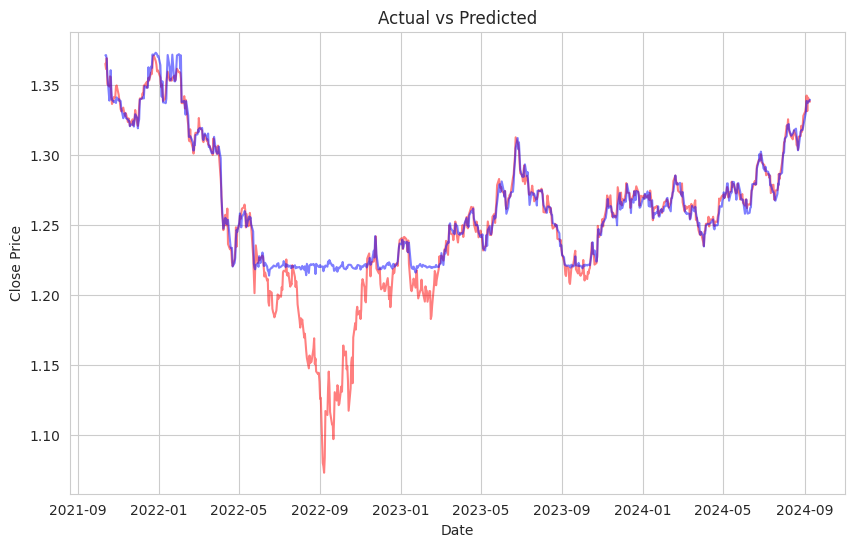

In [120]:
#plot the graph
plt.figure(figsize=(10, 6))
plt.plot(test_date.values,y_test_seq_inverse_xg, alpha=0.5,color='red', label='Actual Values')
plt.plot(test_date.values,xg_test_predictions_best, alpha=0.5, color='blue', label='Predicted Values')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Actual vs Predicted")
plt.show()

In [121]:
model_xgboost_best.save_model('model_xgboost_best.json')

In [122]:
joblib.dump(model_xgboost_best, 'model_xgboost_best.pkl')  # Save model
print("Model Saved Successfully")

Model Saved Successfully


### **Random Forest**

In [123]:
params_rand = {
    'n_estimators': 250,
    'max_depth': 20,
    'min_samples_split': 10,
    'min_samples_leaf': 15
}

In [124]:
# Random forest model with n_estimators 100 and random state 42
random_forest = RandomForestRegressor(**params_rand, random_state=42)
random_forest.fit(x_train_xg, y_train_xg)


RandomForestRegressor(max_depth=20, min_samples_leaf=15, min_samples_split=10,
                      n_estimators=250, random_state=42)

In [125]:
#predict the values on test set
pred_random = random_forest.predict(x_test_xg)
pred_random_inverse = scaler.inverse_transform(pred_random.reshape(-1,1))
y_test_actual_random = scaler.inverse_transform(y_test_xg.reshape(-1,1))

In [126]:
# evaluate the model
mae_random = mean_absolute_error(y_test_actual_random, pred_random_inverse)
rmse_random = np.sqrt(np.mean(((pred_random_inverse - y_test_actual_random) ** 2)))
mse_random = mean_squared_error(y_test_actual_random, pred_random_inverse)
r2_random = r2_score(y_test_actual_random, pred_random_inverse)

print(f"Mean Absolute Error: {mae_random}")
print(f"Root Mean Squared Error: {rmse_random}")
print(f"Mean Square Error: {mse_random}")
print(f"R-squared: {r2_random:.2f}")

Mean Absolute Error: 0.011407514284606518
Root Mean Squared Error: 0.025221687377489897
Mean Square Error: 0.0006361335141678332
R-squared: 0.79


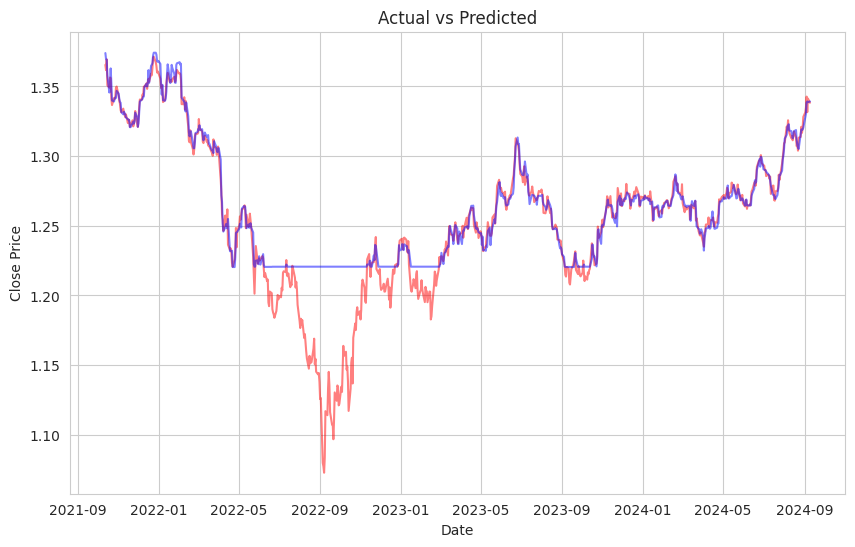

In [127]:
#plot the graph
plt.figure(figsize=(10, 6))
plt.plot(test_date.values,y_test_actual_random, alpha=0.5,color='red', label='Actual Values')
plt.plot(test_date.values,pred_random_inverse, alpha=0.5, color='blue', label='Predicted Values')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Actual vs Predicted")
plt.show()

**Hyperparameter tuning of random forest**

In [128]:
#total number of trees
n_estimator = [200,250]
#limit the depth to control overfitting
max_depth = [15,20]
# the nujber of sample required for each split
min_sample_split = [10,15]
#min samples per leaf node
min_sample_leaf = [1,3]

parameter_random_forest = {
    'n_estimators': n_estimator,
    'max_depth': max_depth,
    'min_samples_split': min_sample_split,
    'min_samples_leaf': min_sample_leaf
}

In [129]:
def best_parameter_random_forest(params,mse_val_rand):
  best_params=[]
  best_mse_score_random = mse_val_rand
  for n_estimators in params['n_estimators']:
    for max_depth in params['max_depth']:
      for min_samples_split in params['min_samples_split']:
        for min_samples_leaf in params['min_samples_leaf']:
            parameter_random_forest = {
                'n_estimators': n_estimators,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf
            }
            model_rand = RandomForestRegressor(**parameter_random_forest)
            model_rand.fit(x_train_xg, y_train_xg)
            #prediction on test data
            temp_prediction_model = model_rand.predict(x_test_xg)
            temp_prediction_inverse = scaler.inverse_transform(temp_prediction_model.reshape(-1,1))
            temp_actual = scaler.inverse_transform(y_test_xg.reshape(-1,1))
            #calculate mse
            mse_loop = mean_squared_error(temp_actual, temp_prediction_inverse)
            print("parameter", parameter_random_forest)
            print("mse", mse_loop)
            if mse_loop < best_mse_score_random:
              print('Best Parameter')
              best_params = parameter_random_forest
              best_mse_score_random = mse_loop
  return best_params, best_mse_score_random


In [130]:
best_params_random,best_mse_score_random=best_parameter_random_forest(parameter_random_forest,mse_random)

parameter {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 1}
mse 0.0005020896235924551
Best Parameter
parameter {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 3}
mse 0.0005447083313134084
parameter {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 15, 'min_samples_leaf': 1}
mse 0.00052200980371127
parameter {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 15, 'min_samples_leaf': 3}
mse 0.0005538559832980305
parameter {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 1}
mse 0.0005026502209589905
parameter {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 3}
mse 0.0005351743298888339
parameter {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 1}
mse 0.0005145739611491277
parameter {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 3}
mse 0.0005523991243236371
par

In [131]:
best_mode_random_forest = RandomForestRegressor(**best_params_random)
best_mode_random_forest.fit(x_train_xg, y_train_xg)

RandomForestRegressor(max_depth=20, min_samples_split=10, n_estimators=250)

In [132]:
best_params_random

{'n_estimators': 250,
 'max_depth': 20,
 'min_samples_split': 10,
 'min_samples_leaf': 1}

In [133]:
#prediction on test data
best_mode_pred_random = best_mode_random_forest.predict(x_test_xg)
best_model_pred_inverse_random = scaler.inverse_transform(best_mode_pred_random.reshape(-1,1))
actual_values_random_forest = scaler.inverse_transform(y_test_xg.reshape(-1,1))

In [134]:
#evaluate the prediction
best_mae_rnd = mean_absolute_error(actual_values_random_forest, best_model_pred_inverse_random)
best_rmse_rnd = np.sqrt(np.mean(((best_model_pred_inverse_random - actual_values_random_forest) ** 2)))
best_mse_rnd = mean_squared_error(actual_values_random_forest, best_model_pred_inverse_random)
best_r2_rnd = r2_score(actual_values_random_forest, best_model_pred_inverse_random)

print(f"Mean Absolute Error: {best_mae_rnd}")
print(f"Root Mean Squared Error: {best_rmse_rnd}")
print(f"Mean Square Error: {best_mse_rnd}")
print(f"R-squared: {best_r2_rnd:.2f}")

Mean Absolute Error: 0.009952763998413692
Root Mean Squared Error: 0.02232080743343187
Mean Square Error: 0.0004982184444803474
R-squared: 0.84


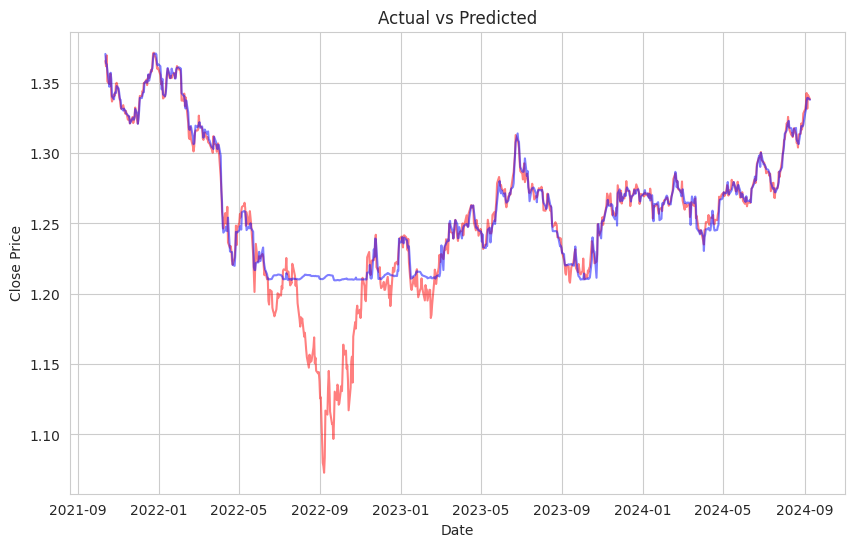

In [135]:
#plot the graph
plt.figure(figsize=(10, 6))
plt.plot(test_date.values,actual_values_random_forest, alpha=0.5,color='red', label='Actual Values')
plt.plot(test_date.values,best_model_pred_inverse_random, alpha=0.5, color='blue', label='Predicted Values')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Actual vs Predicted")
plt.show()

In [136]:
joblib.dump(best_mode_random_forest, 'random_forest_model_best.pkl')

['random_forest_model_best.pkl']

## **Compaarison between models**

In [184]:
def load_model():
  #XG Boost load
  model_xg = XGBRegressor()
  model_xg = joblib.load('model_xgboost_best.pkl')
  #random forest model load
  model_rand_load = joblib.load('random_forest_model_best.pkl')
  #Gru Load
  model_gru_load = tf.keras.models.load_model('gru_model.keras')
  #LSTM Load
  model_lstm_load = tf.keras.models.load_model('lstm_model.keras')

  return model_xg, model_gru_load, model_lstm_load, model_rand_load


In [185]:
def evaluate_model(model_name, actual, prediction):
  #mse
  mse = mean_squared_error(actual, prediction)
  #mae
  mae = mean_absolute_error(actual, prediction)
  #rmse
  rmse = np.sqrt(np.mean(((prediction - actual) ** 2)))
  #r2
  r2 = r2_score(actual, prediction)
  matrix = {'Model Name': model_name,'mse':mse, 'mae':mae, 'rmse':rmse, 'r2':r2}
  return matrix

In [186]:
model_xg,model_gru_laod,model_lstm_load, model_random_forest = load_model()


In [187]:
#lstm prediction
prediction_lstm_load = model_lstm_load.predict(data_feature_test_series)
prediction_inverse_load = scaler.inverse_transform(prediction_lstm_load)
actual_prices = scaler.inverse_transform(y_target_test_series)
ev_lstm = evaluate_model("LSTM", actual_prices, prediction_inverse_load)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [188]:
#gru prediction
prediction_gru_load = model_gru_laod.predict(data_feature_test_series)
prediction_inverse_gru = scaler.inverse_transform(prediction_gru_load)
ev_gru = evaluate_model("GRU", actual_prices, prediction_inverse_gru)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [189]:
#xgboost prediction
xg_test_predictions_load = model_xg.predict(x_test_xg)
xg_test_predictions_laod = scaler.inverse_transform(xg_test_predictions_load.reshape(-1,1))
ev_xg = evaluate_model("XGBoost", actual_prices, xg_test_predictions_laod)

In [190]:
#random forest prediction
rand_load_prediction = model_random_forest.predict(x_test_xg)
rand_load_prediction_inverse = scaler.inverse_transform(rand_load_prediction.reshape(-1,1))
ev_rand = evaluate_model("Random Forest", actual_prices, rand_load_prediction_inverse)

In [191]:
results_models = pd.DataFrame([ev_lstm, ev_gru, ev_xg, ev_rand])
results_models

,Model Name,mse,mae,rmse,r2
0,LSTM,0.000440,0.012460,0.020980,0.854407
1,GRU,0.000032,0.004126,0.005637,0.989491
2,XGBoost,0.000632,0.011513,0.025133,0.791074
3,Random Forest,0.000498,0.009953,0.022321,0.835211


## **Back Testing**

In [192]:
def generate_signals(prediction_values, actual_values):
  signal = []
  for i in range(len(prediction_values)-1):
    if prediction_values[i + 1] > actual_values[i]:
      signal.append(1)
    elif prediction_values[i + 1] < actual_values[i]:
      signal.append(-1)
  return signal

In [193]:
#lstm model signal
signal_lstm = generate_signals(prediction_inverse_load, actual_prices)
#gru model signal
signal_gru = generate_signals(prediction_inverse_gru, actual_prices)
#xgboost model signal
signal_xg = generate_signals(xg_test_predictions_laod, actual_prices)
#random forest model signal
signal_rand = generate_signals(rand_load_prediction_inverse, actual_prices)

In [194]:
def backtest_strategy(signal, actual_values,initial_capital = 10000,
                      position_size = 0):
  #make sure the data type
  signal = np.array(signal)
  actual_values = np.array(actual_values)
  #initialise the values
  portfolio_history = []
  initial_capital = initial_capital
  position_size = position_size
  wallet_balance = initial_capital
  num_of_position = 0
  entry_price = 0
  #for loop to over actual values and make trades according to the signal
  for i in range(len(actual_values)-1):
    current_price = actual_values[i]
    signal_value = signal[i]
    #buy signal
    if signal_value == 1 and num_of_position == 0:
      position_size = int(wallet_balance // current_price)
      #cost of the trade
      cost = position_size * current_price[0]
      #wallet balance after the trade
      wallet_balance = wallet_balance - cost
      # append the number of postions
      num_of_position += 1
    #sell signal
    elif signal_value == -1 and num_of_position > 0:
      #cost price
      cost = position_size * current_price[0]
      # wallet size after sale
      wallet_balance = wallet_balance + cost
      position_size=0
      # reset the number of position
      num_of_position = 0
    # calculate the wallet balance at the end of the day
    portfolio_history.append(wallet_balance + position_size * current_price)
    profit = portfolio_history[-1] - initial_capital

  return portfolio_history, profit



In [195]:
#lstm portfolio
lstm_portfolio, profit_lstm= backtest_strategy(signal_lstm, actual_prices)
#gru portfolio
gru_portfolio, profit_gru = backtest_strategy(signal_gru, actual_prices)
#xgboost portfolio
xg_portfolio, profit_xg = backtest_strategy(signal_xg, actual_prices)
#random forest portfolio
random_portfolio, profit_random = backtest_strategy(signal_rand, actual_prices)


<ipython-input-194-5c4e12dcb5fa>:19: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



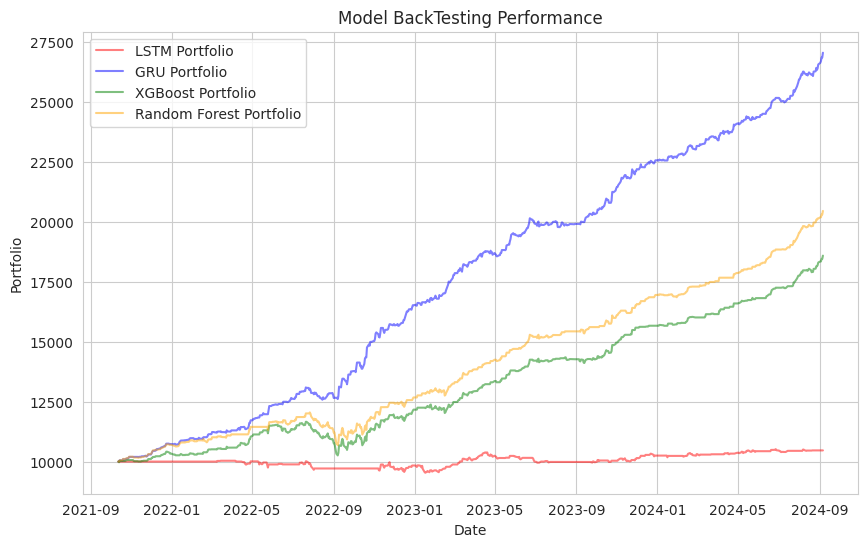

In [196]:
#plot the graph
plt.figure(figsize=(10, 6))
plt.plot(test_date.values[:len(lstm_portfolio)],lstm_portfolio, alpha=0.5,color='red', label='LSTM Portfolio')
plt.plot(test_date.values[:len(gru_portfolio)],gru_portfolio, alpha=0.5, color='blue', label='GRU Portfolio')
plt.plot(test_date.values[:len(xg_portfolio)],xg_portfolio, alpha=0.5, color='green', label='XGBoost Portfolio')
plt.plot(test_date.values[:len(random_portfolio)],random_portfolio, alpha=0.5, color='orange', label='Random Forest Portfolio')
plt.xlabel("Date")
plt.ylabel("Portfolio")
plt.legend()
plt.title("Model BackTesting Performance")
plt.show()

In [197]:
def performance_analyse(portfolio,profit):
  #convert into numpy array
  portfolio = np.array(portfolio)
  #calculate the daily return
  daily_return = portfolio[1:] / portfolio[:-1] - 1
  #calculate sharpe ratio
  sharpe_ratio = np.mean(daily_return) / np.std(daily_return) * np.sqrt(252)

  #max drawdown
  peak = np.max(portfolio)
  drawdown = (peak - portfolio) / peak
  max_drawdown = np.max(drawdown)
  metric = {
      'initial_capital': 10000,
      'Closing Balance': portfolio[-1][0],
      'Profit': profit[0],
      'sharpe_ratio': sharpe_ratio,
      'max_drawdown': max_drawdown



  }
  return metric

In [198]:
lstm_analysis = performance_analyse(lstm_portfolio,profit_lstm)
gru_analysis = performance_analyse(gru_portfolio,profit_gru)
xg_analysis = performance_analyse(xg_portfolio,profit_xg)
rand_analysis = performance_analyse(random_portfolio,profit_random)

In [199]:
df = pd.DataFrame([lstm_analysis, gru_analysis, xg_analysis, rand_analysis])
df.index = ['LSTM', 'GRU', 'XGBoost', 'Random Forest']
df

,initial_capital,Closing Balance,Profit,sharpe_ratio,max_drawdown
LSTM,10000,10466.753684,466.753684,0.351014,0.093559
GRU,10000,27063.588786,17063.588786,5.016844,0.630500
XGBoost,10000,18594.876451,8594.876451,2.748062,0.463715
Random Forest,10000,20460.849033,10460.849033,3.277823,0.511262
